<a href="https://colab.research.google.com/github/Manu-Sanchez/Learning/blob/ai%2Fbasic-gan/RNN_Recursive_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = torch.linspace(0, 999, 1000)
data = torch.sin(data * 2 * 3.14 / 40)

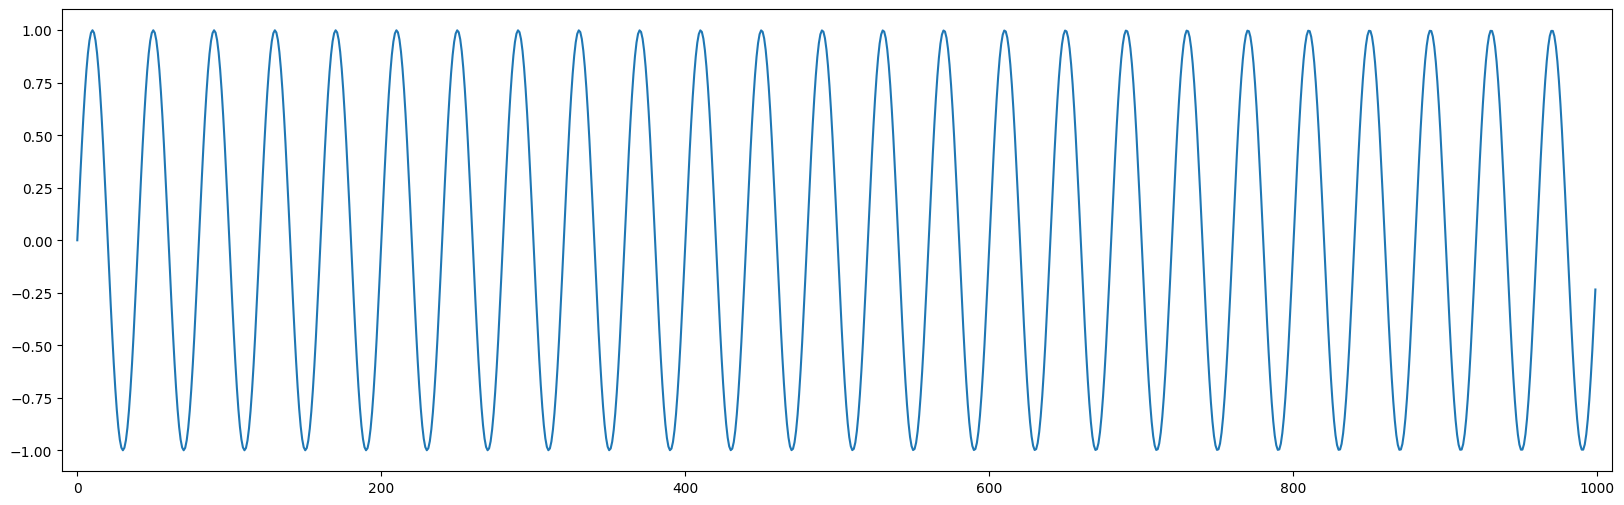

In [3]:
plt.figure(figsize=(20,6))
plt.xlim(-10, 1010)
plt.plot(data)
plt.show()

1000
900
100
torch.Size([900])
torch.Size([100])


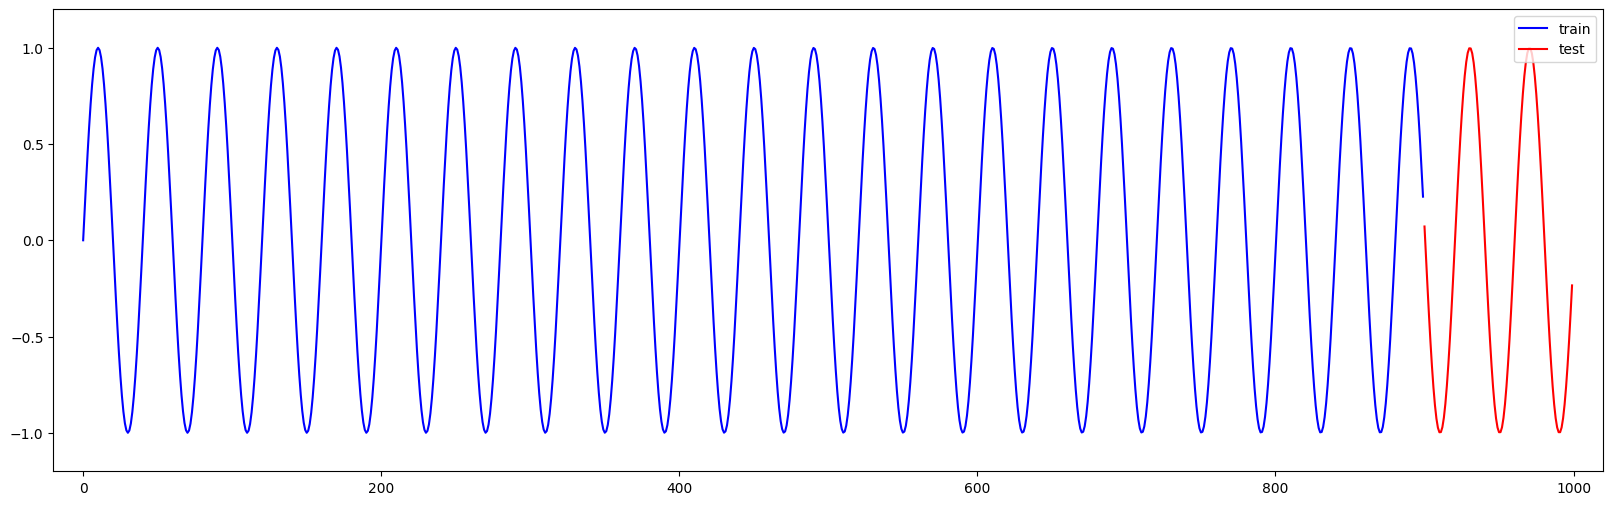

In [4]:
train_size = int(len(data) * 0.9)
test_size = len(data) - train_size

print(len(data))
print(train_size)
print(test_size)

train_data = data[:train_size]
test_data = data[train_size:]

print(train_data.shape)
print(test_data.shape)

plt.figure(figsize=(20,6))
plt.xlim(-20, 1020)
plt.ylim(-1.2, 1.2)
plt.plot(train_data, color="b", label="train")
plt.plot(range(train_size, len(data)), test_data, color="r", label="test")
plt.legend(loc="upper right")
plt.show()

In [5]:
def split_data(seq, ws):

  out = [] #([0,1,2,3], [4]), ([1,2,3,4], [5])
  L = len(seq)

  for i in range(L-ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]

    out.append((window, label))

  return out


window_size = 50

train_data = split_data(train_data, window_size)

# Example

In [18]:
lstm_layer = nn.LSTM(1, 50)
linear_layer = nn.Linear(50, 1)
i = 0

In [100]:
hidden_values = [
    torch.zeros(1,1,50),
    torch.zeros(1,1,50)
]

data, label = train_data[i]
data = data.reshape(len(data), 1, -1)

lstm_output, hidden_values = lstm_layer(data, hidden_values)
pred = linear_layer(lstm_output.reshape(len(data), -1))[-1]

losses = []

loss = criterion(pred, label)
optim.zero_grad()
loss.backward()
optim.step()

print(f"Predicted {pred.item()} Label: {label.item()} Loss {loss}")
i+=1

Predicted -0.1973882019519806 Label: 0.9892662763595581 Loss 1.4081487655639648


In [113]:
class RecurrentNetwork(nn.Module):

  def __init__(self, input_size=1, hidden_size=50, out_size=1):

    super().__init__()
    self.hidden_size = hidden_size

    self.lstm = nn.LSTM(input_size, hidden_size)
    self.linear = nn.Linear(hidden_size, out_size)

    self.hidden = (
        torch.zeros(1,1,hidden_size), #Hidden State
        torch.zeros(1,1,hidden_size) #Cell State
    )

  def forward(self, seq):

    lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
    pred = self.linear(lstm_out.view(len(seq), -1))

    return pred[-1]


model = RecurrentNetwork()
criterion = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=1e-3)

In [27]:
model

RecurrentNetwork(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [76]:
train_data[-1]

(tensor([ 0.9749,  0.9977,  0.9960,  0.9698,  0.9198,  0.8471,  0.7536,  0.6415,
          0.5137,  0.3732,  0.2236,  0.0684, -0.0884, -0.2431, -0.3917, -0.5308,
         -0.6568, -0.7666, -0.8576, -0.9274, -0.9745, -0.9976, -0.9962, -0.9702,
         -0.9204, -0.8479, -0.7546, -0.6427, -0.5151, -0.3747, -0.2251, -0.0700,
          0.0868,  0.2415,  0.3903,  0.5294,  0.6556,  0.7656,  0.8567,  0.9268,
          0.9742,  0.9975,  0.9963,  0.9706,  0.9210,  0.8488,  0.7557,  0.6440,
          0.5164,  0.3762]),
 tensor([0.2267]))

Epoch 0 Loss: 0.01993507705628872
Performance on test set: 0.7706416845321655
Epoch 1 Loss: 0.0011258480371907353
Performance on test set: 0.786024808883667
Epoch 2 Loss: 0.009185298345983028
Performance on test set: 0.8157849907875061
Epoch 3 Loss: 0.04052846133708954
Performance on test set: 0.8431260585784912
Epoch 4 Loss: 0.06407169997692108
Performance on test set: 0.8620786070823669
Epoch 5 Loss: 0.0726132020354271
Performance on test set: 0.8814988732337952
Epoch 6 Loss: 0.07351578772068024
Performance on test set: 0.8908140659332275
Epoch 7 Loss: 0.07166170328855515
Performance on test set: 0.8920549154281616
Epoch 8 Loss: 0.06893634796142578
Performance on test set: 0.8895795941352844
Epoch 9 Loss: 0.06596583127975464
Performance on test set: 0.8855441212654114
Epoch 10 Loss: 0.06294289976358414
Performance on test set: 0.8807792067527771
Epoch 11 Loss: 0.05991830676794052
Performance on test set: 0.8755947947502136
Epoch 12 Loss: 0.05689792335033417
Performance on test set: 0

<ipython-input-114-62b137cffba9>:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,4))


Epoch 21 Loss: 0.028774410486221313
Performance on test set: 0.8309723138809204
Epoch 22 Loss: 0.025607004761695862
Performance on test set: 0.8323230147361755
Epoch 23 Loss: 0.02250794693827629
Performance on test set: 0.8359494209289551
Epoch 24 Loss: 0.01951727457344532
Performance on test set: 0.8419661521911621
Epoch 25 Loss: 0.016678325831890106
Performance on test set: 0.8502979874610901
Epoch 26 Loss: 0.014034109190106392
Performance on test set: 0.860690176486969
Epoch 27 Loss: 0.011623299680650234
Performance on test set: 0.8727959990501404
Epoch 28 Loss: 0.00947586540132761
Performance on test set: 0.8863380551338196
Epoch 29 Loss: 0.007609620690345764
Performance on test set: 0.9012803435325623
Epoch 30 Loss: 0.006028138101100922
Performance on test set: 0.917908251285553
Epoch 31 Loss: 0.004720959346741438
Performance on test set: 0.9367403388023376
Epoch 32 Loss: 0.0036658861208707094
Performance on test set: 0.9582645297050476
Epoch 33 Loss: 0.0028325384482741356
Perform

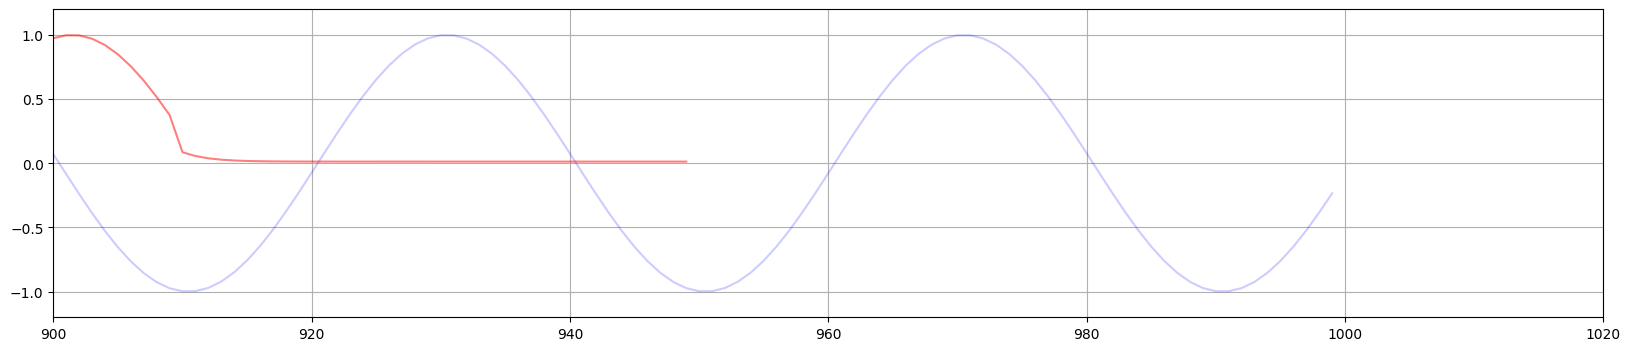

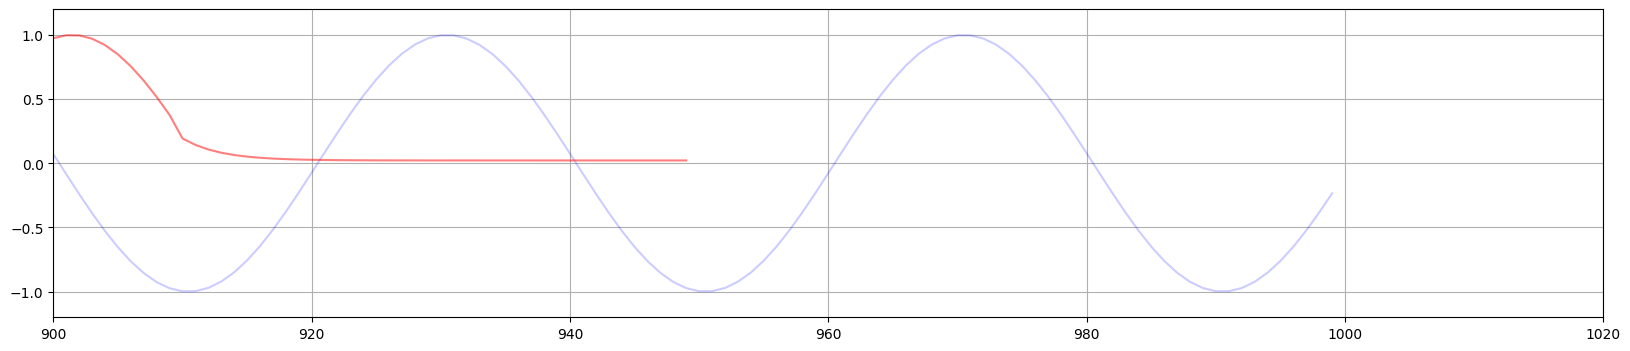

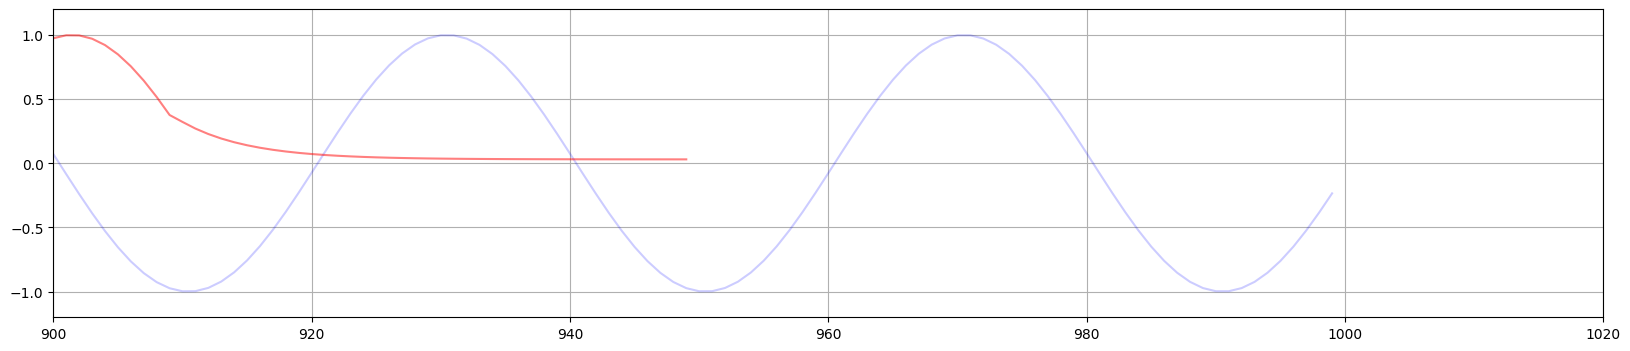

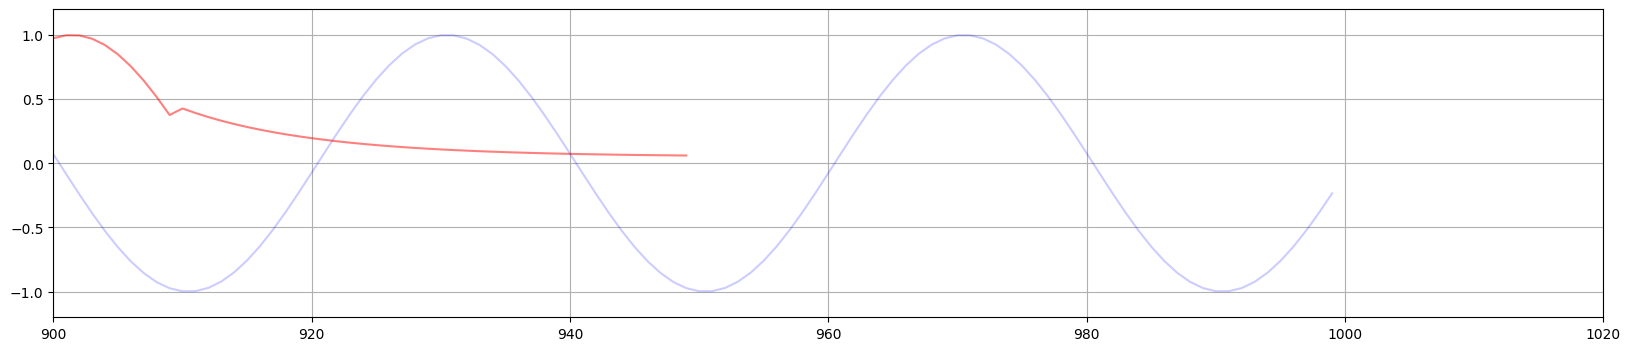

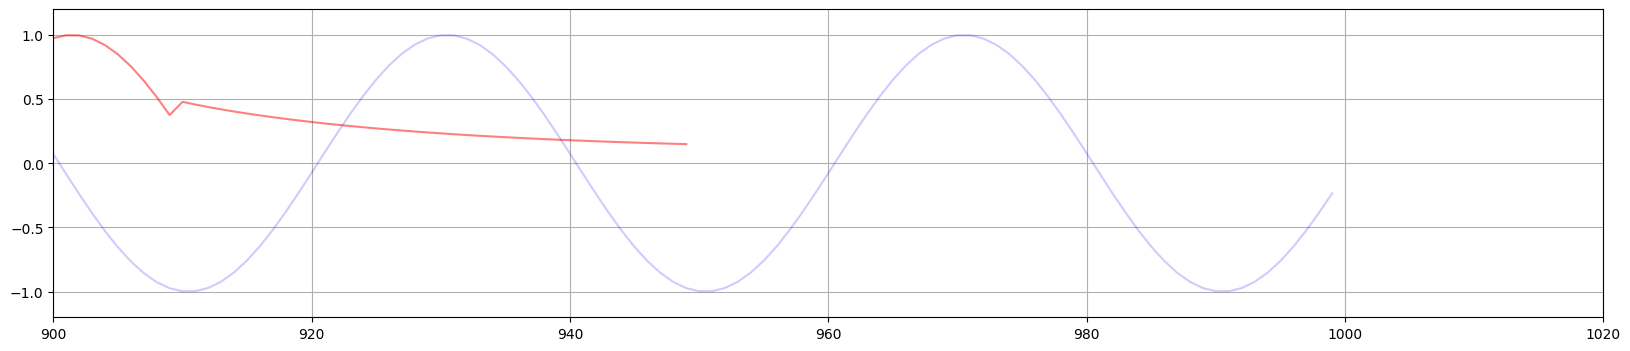

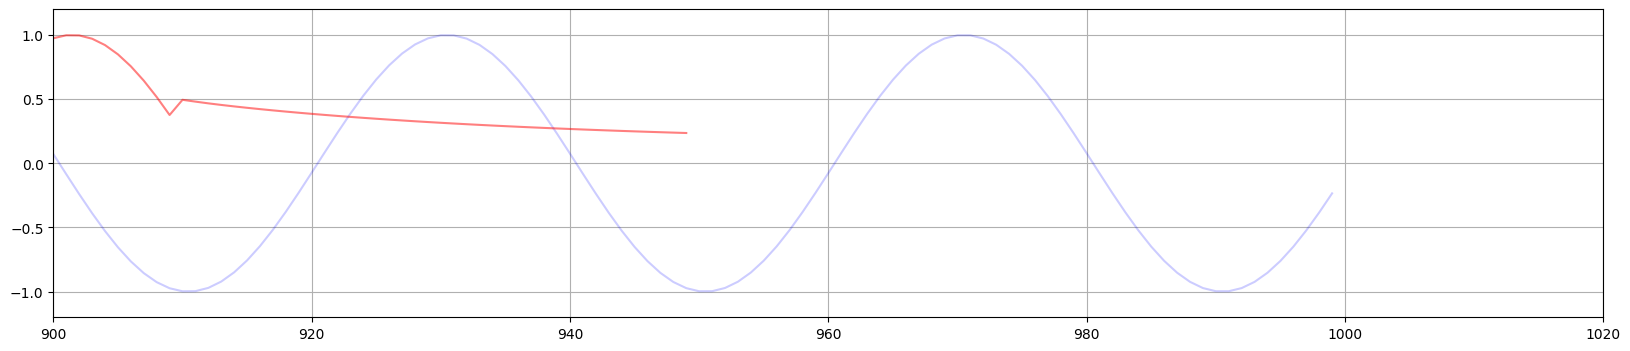

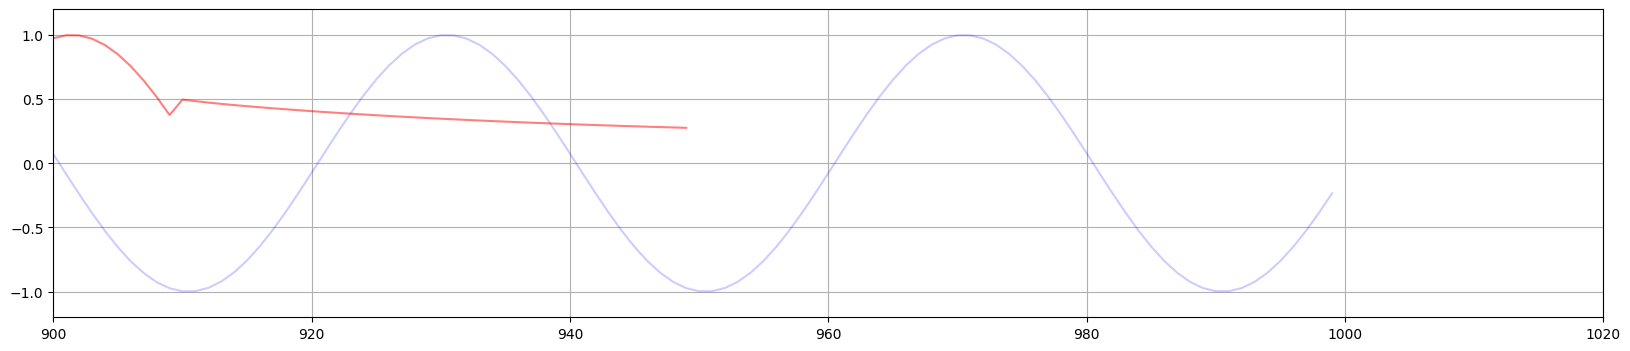

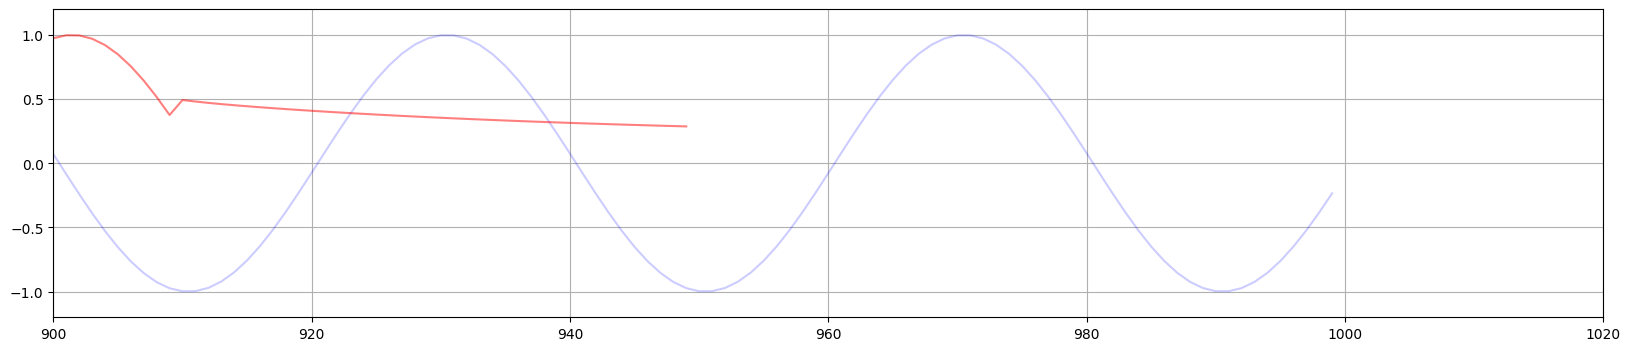

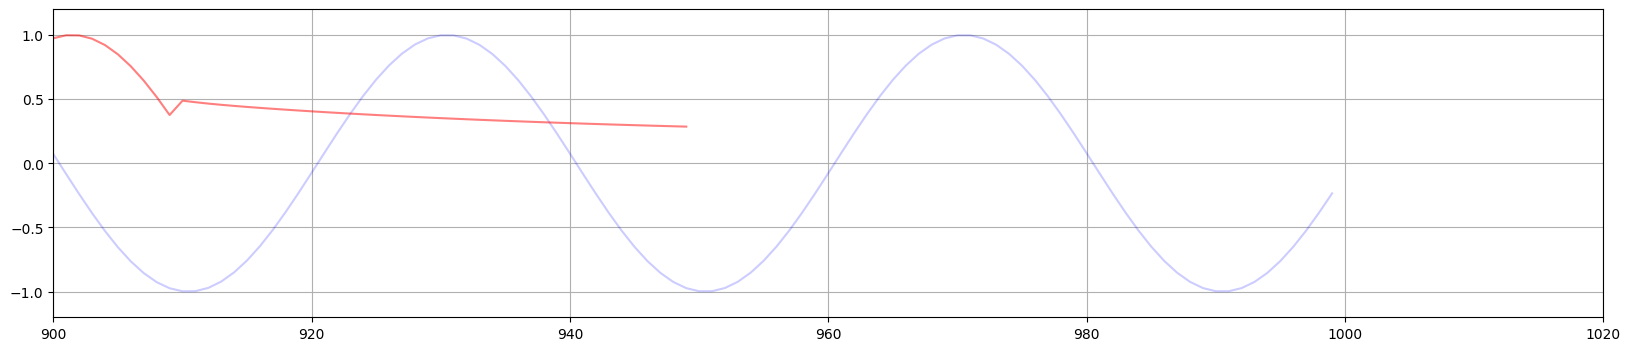

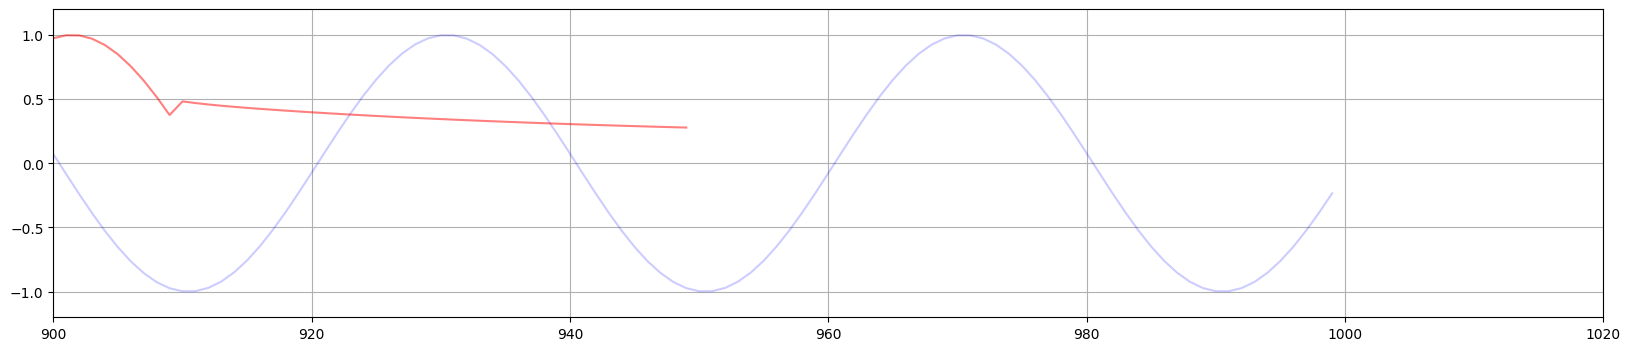

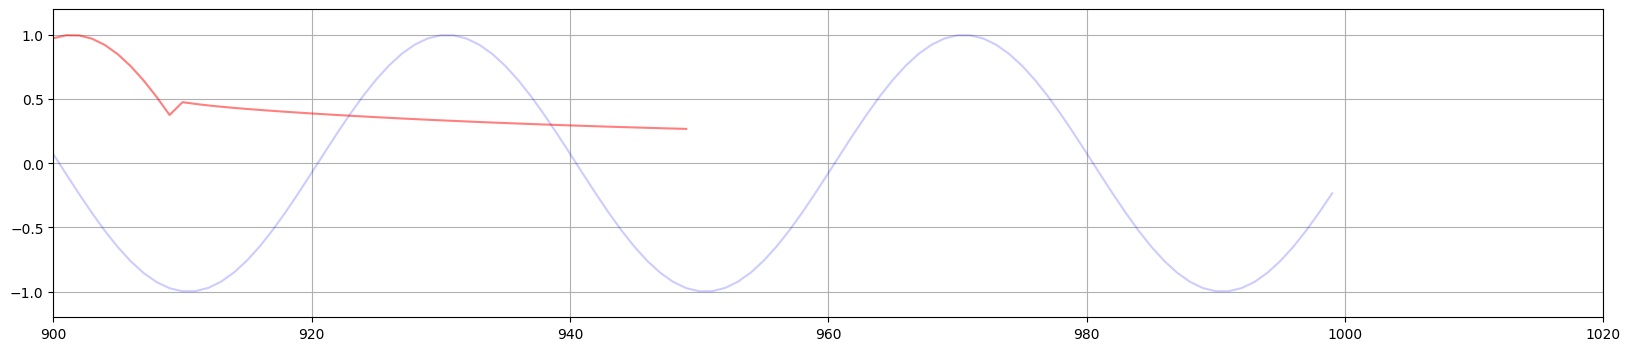

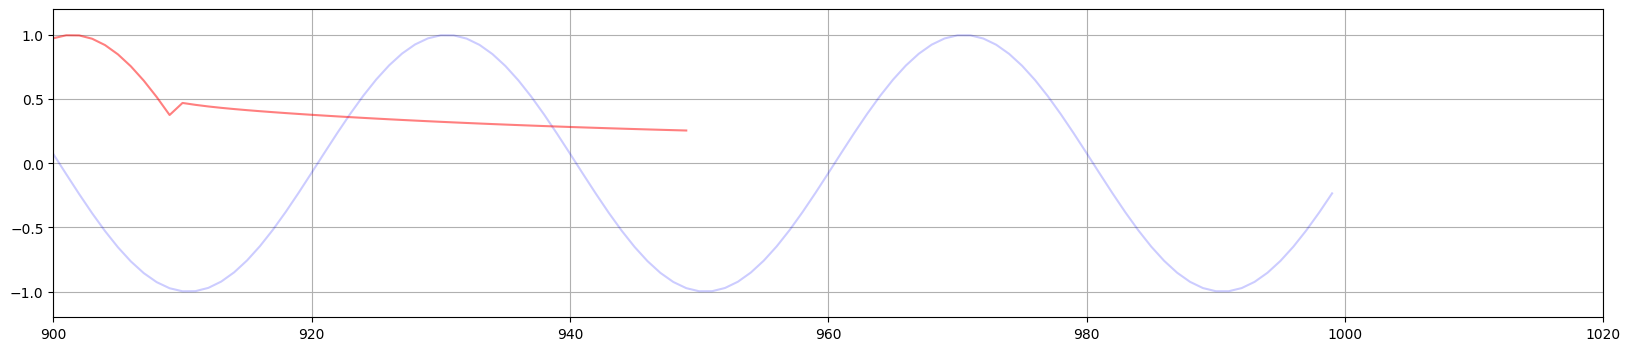

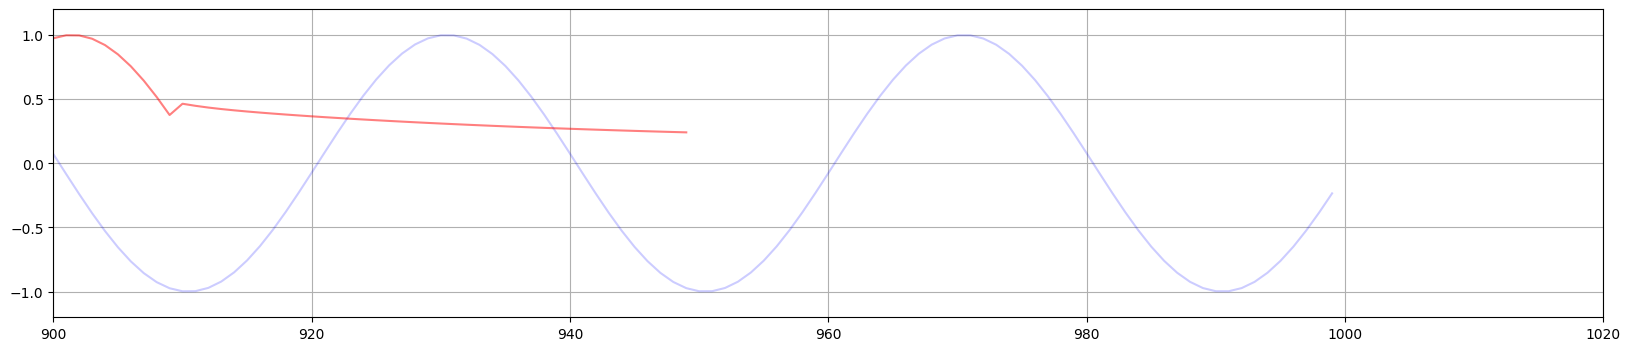

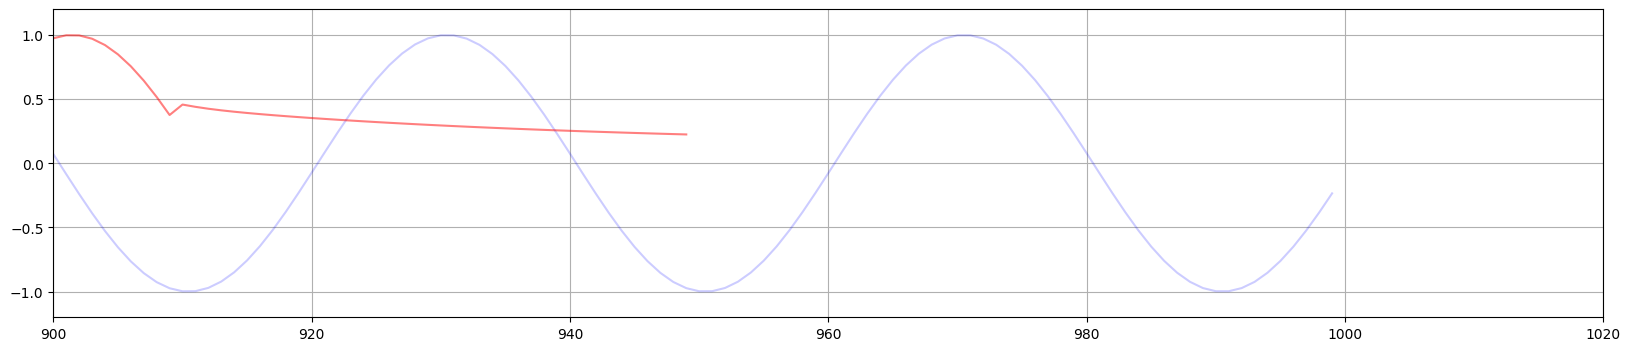

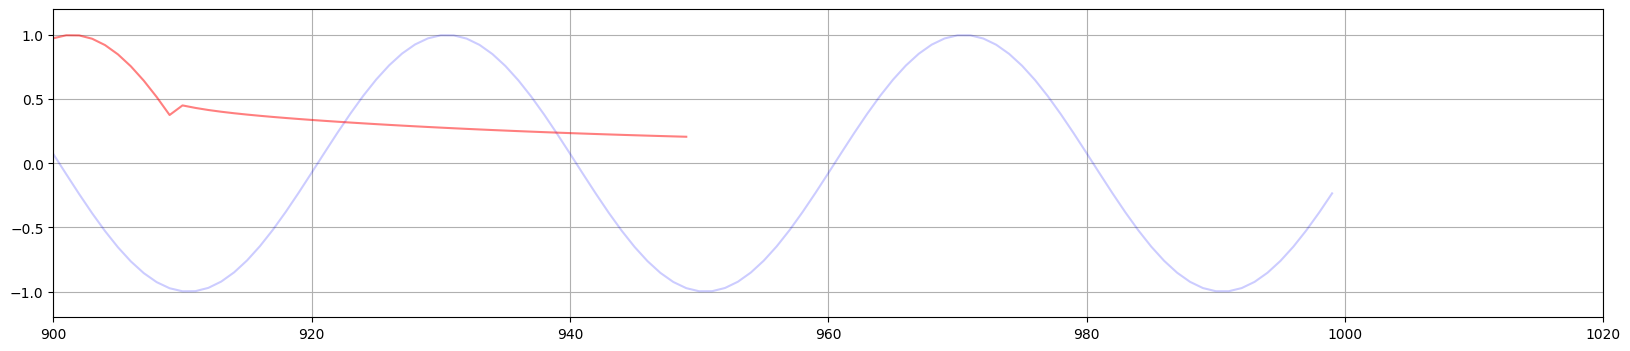

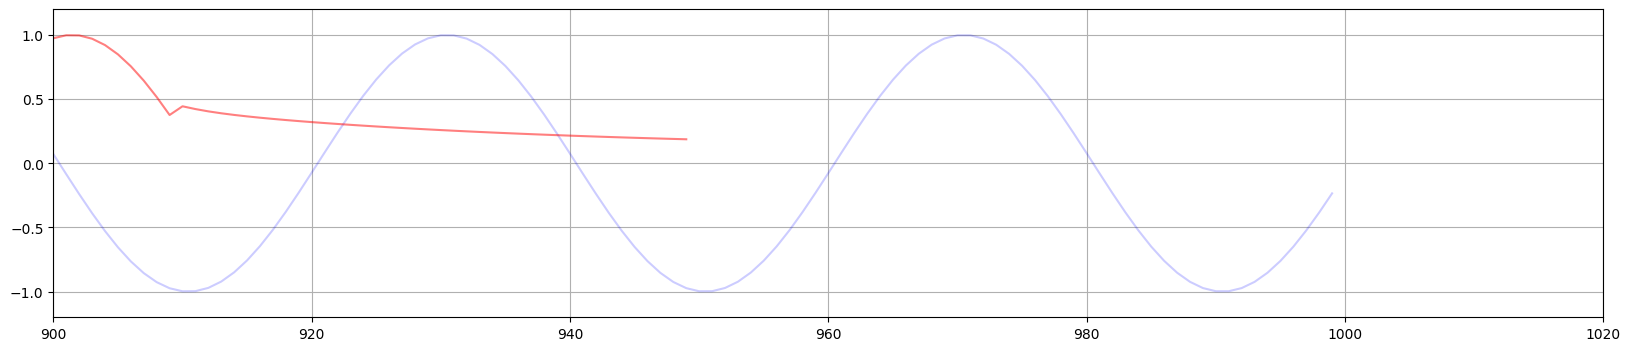

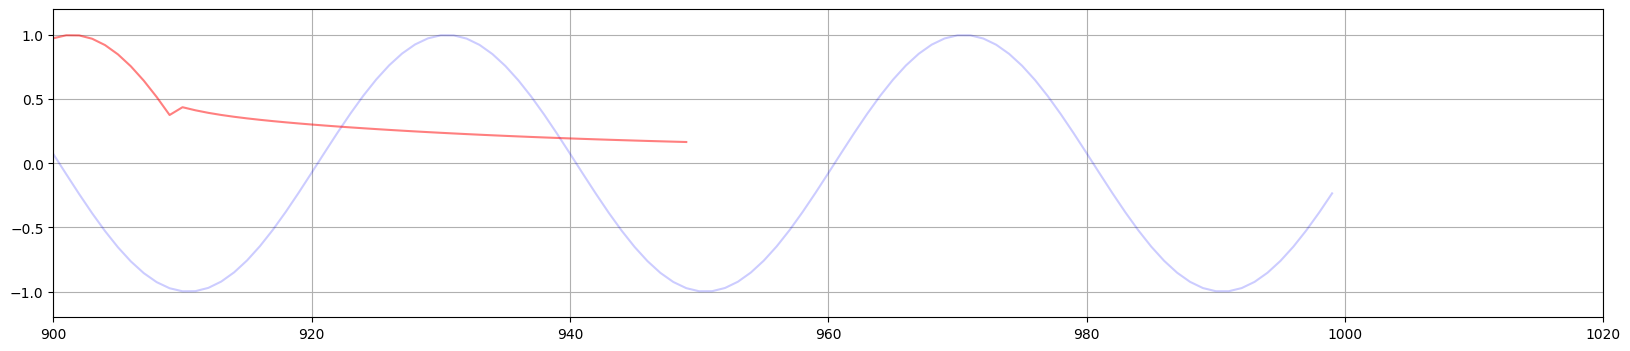

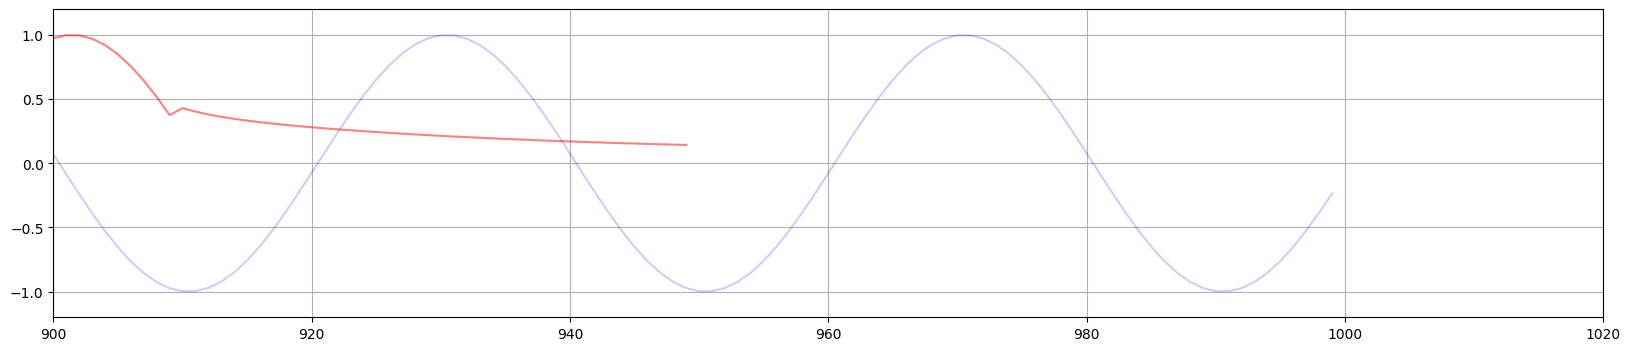

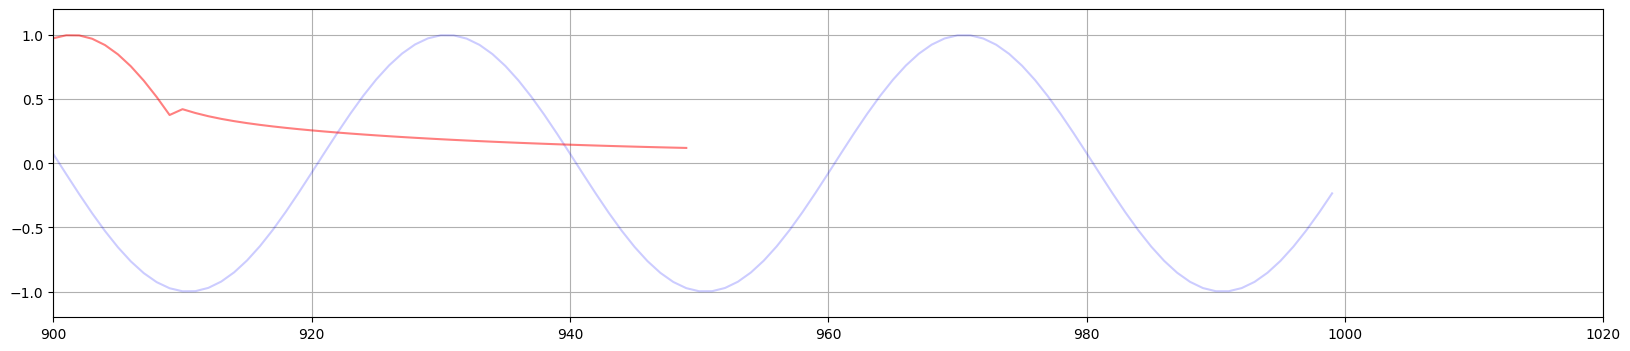

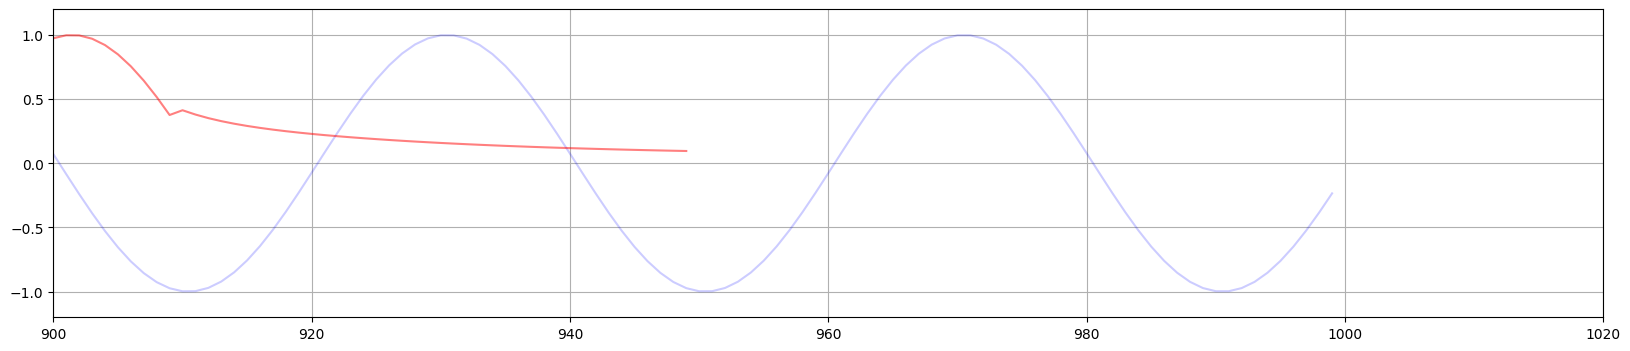

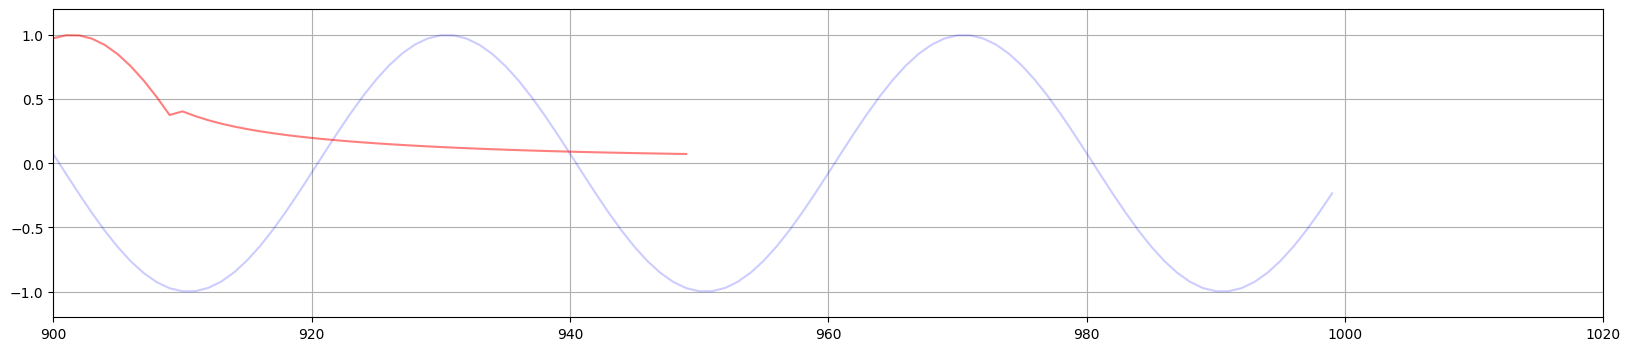

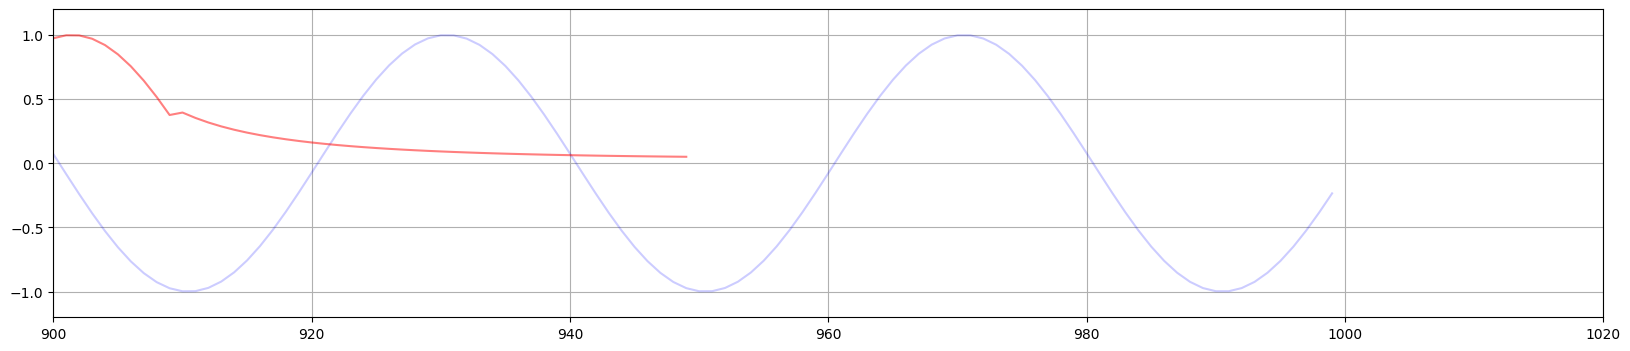

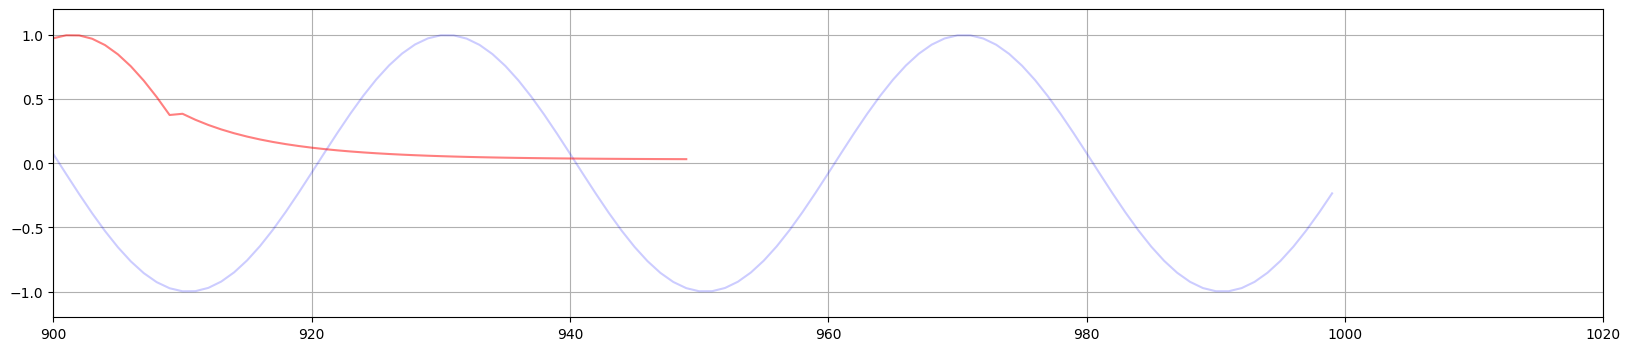

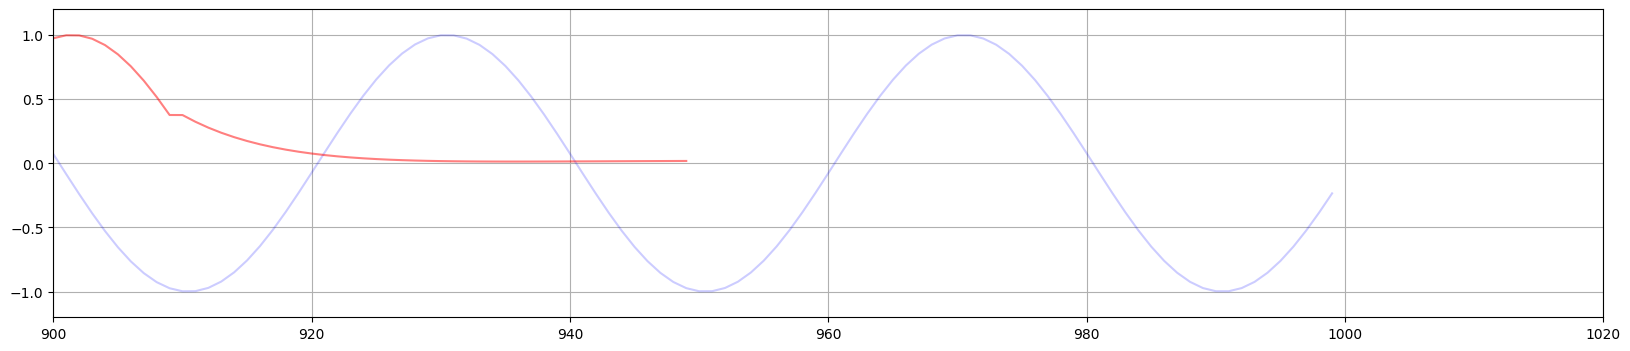

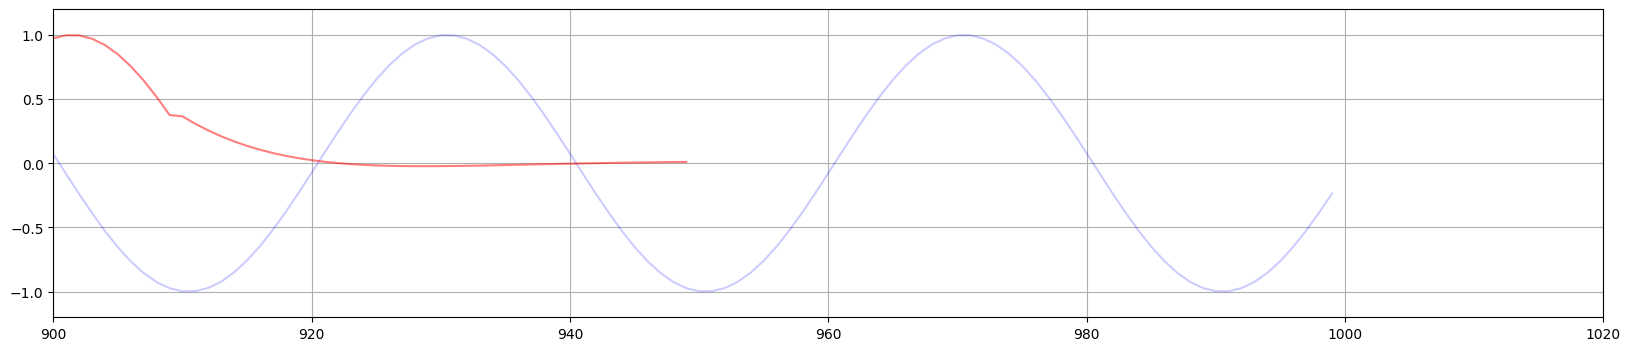

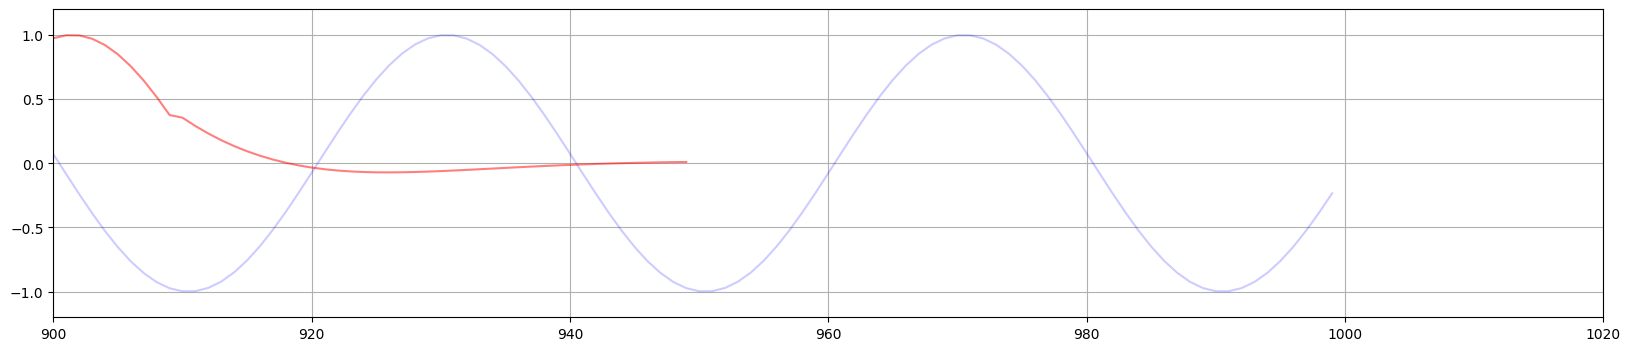

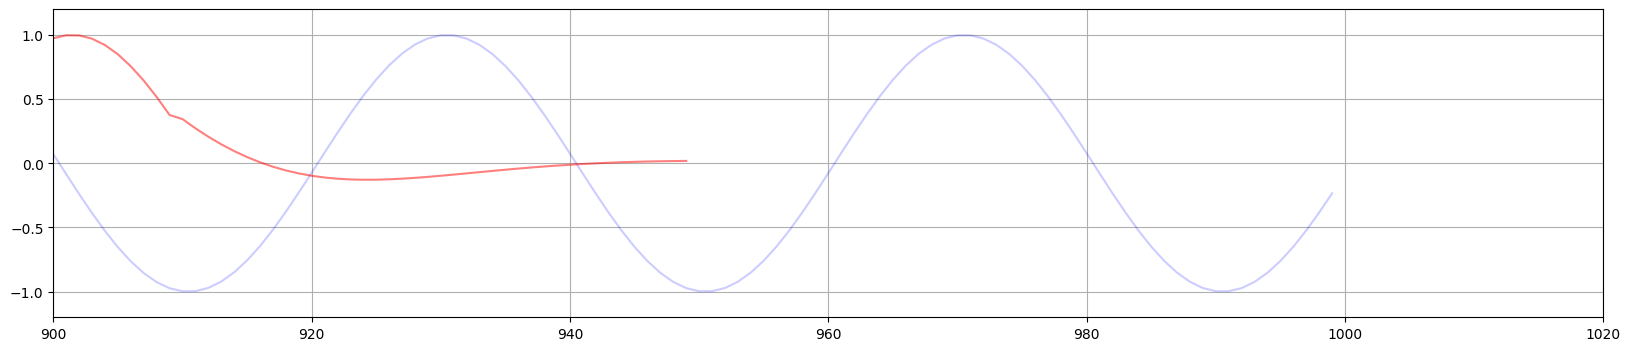

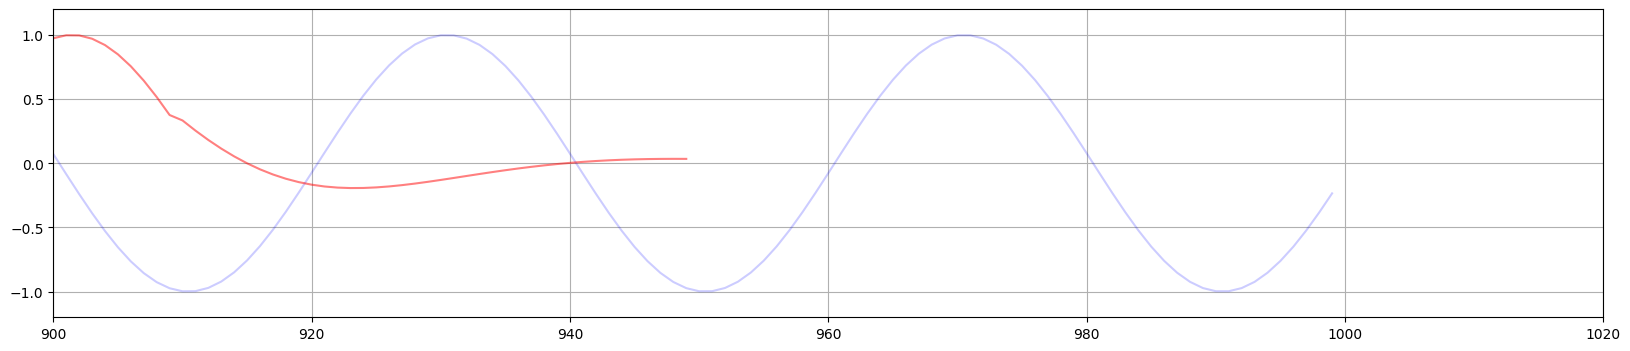

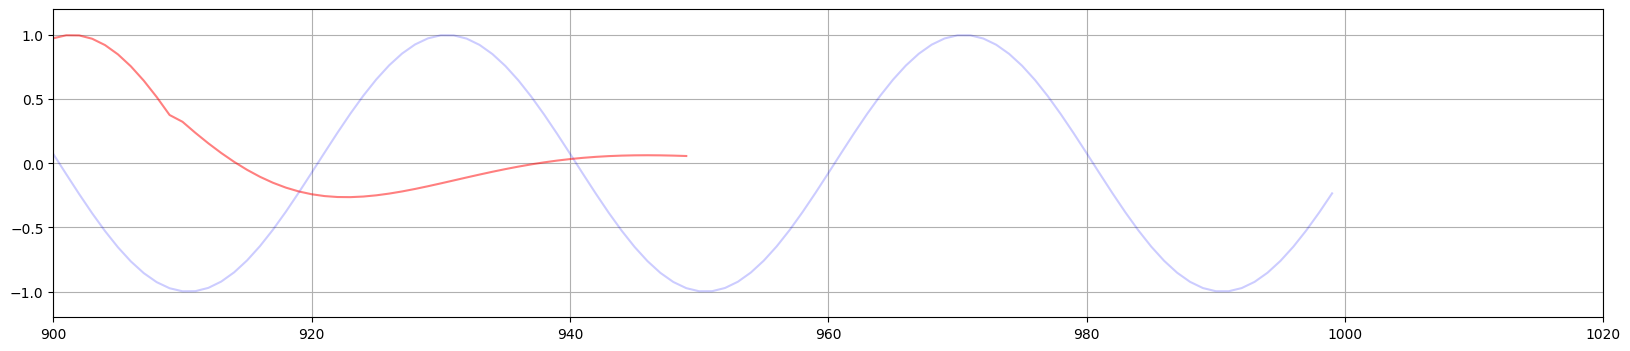

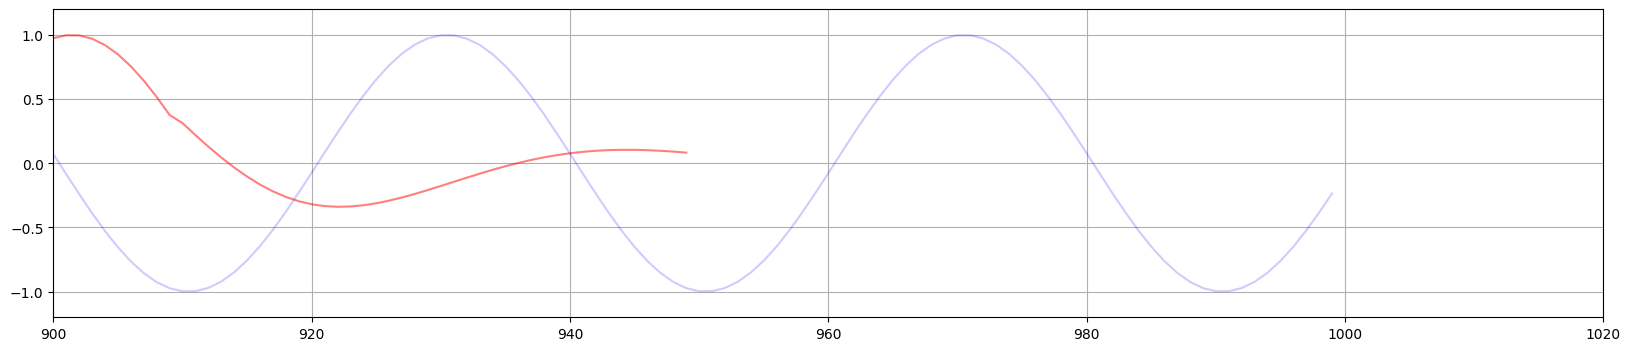

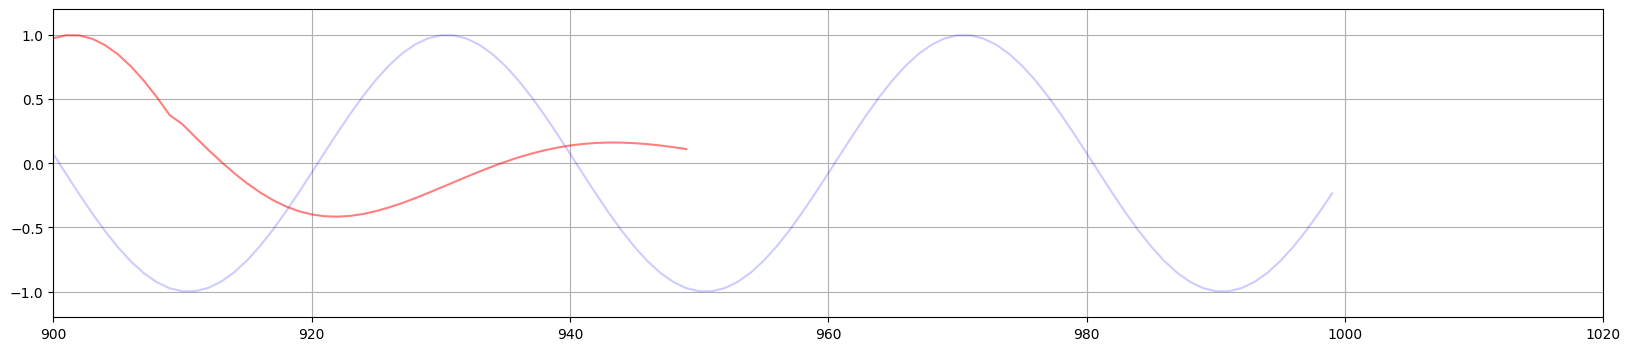

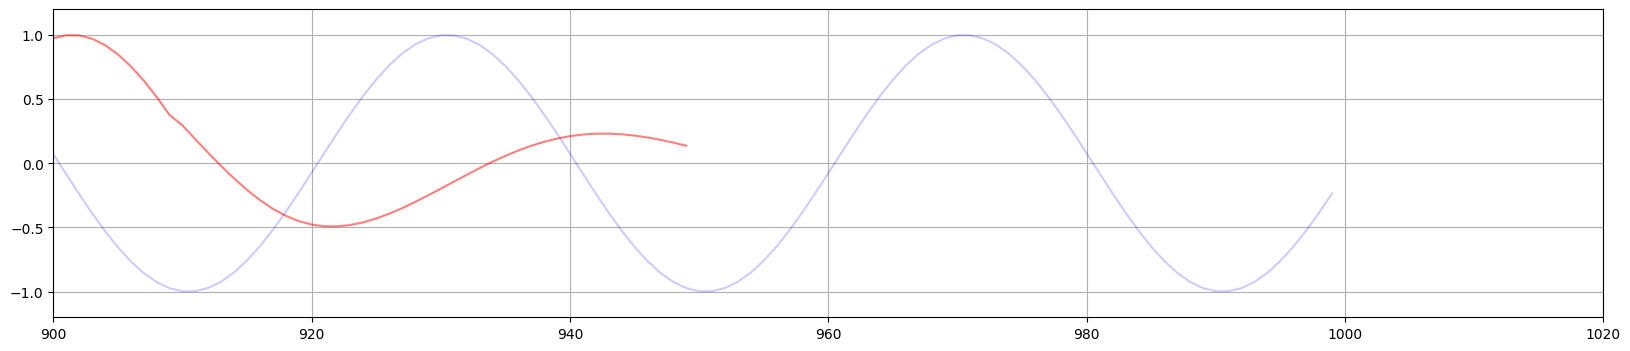

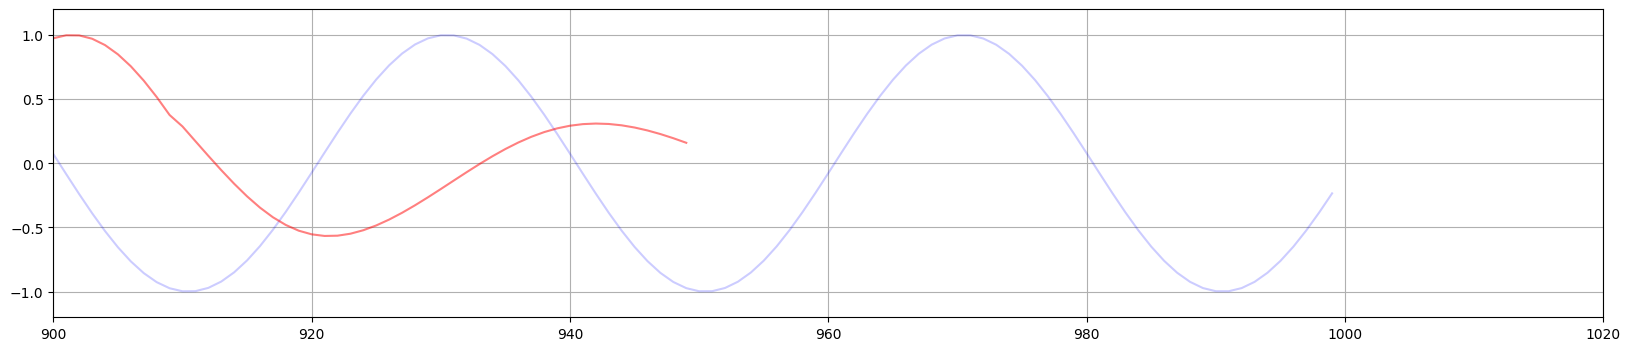

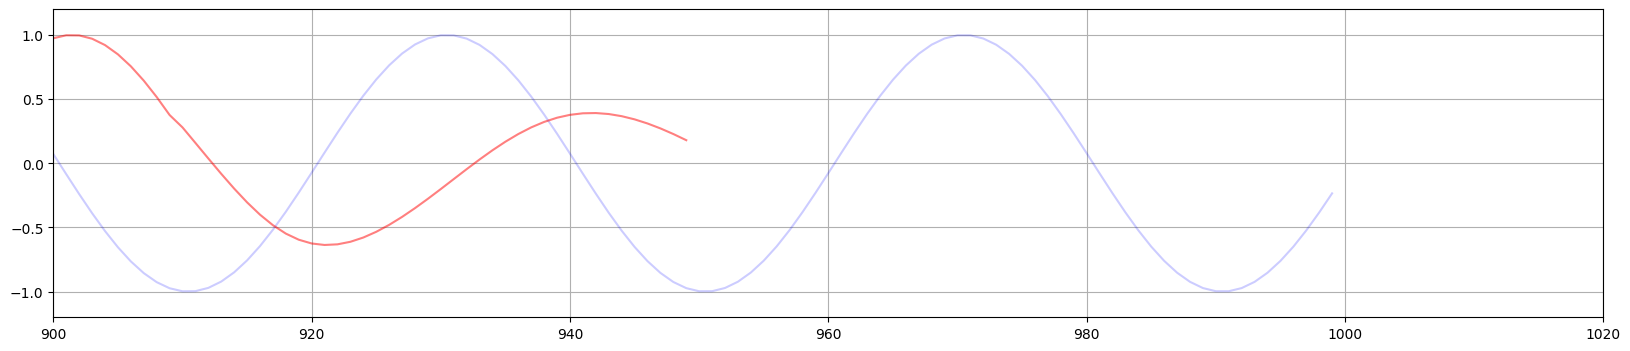

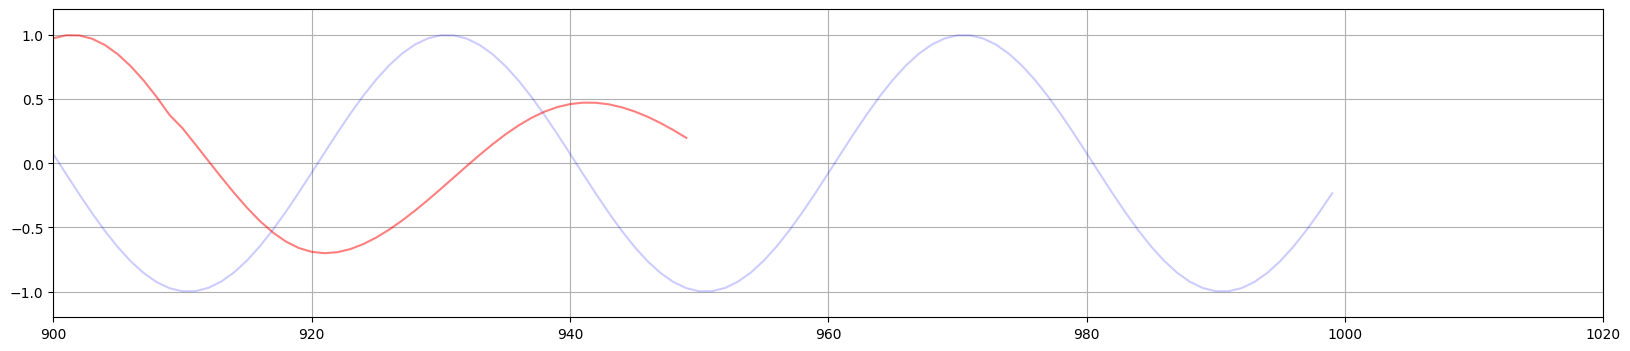

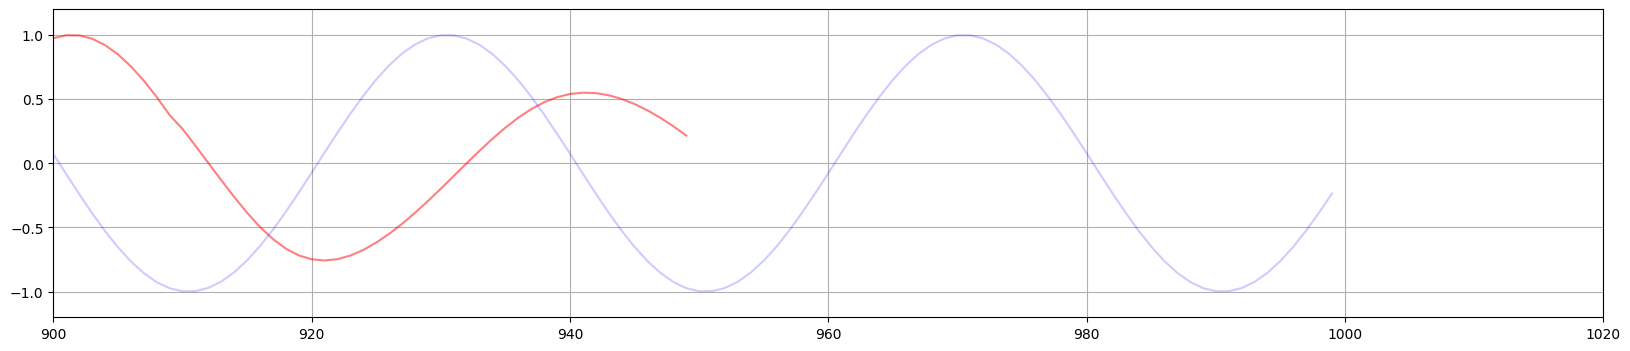

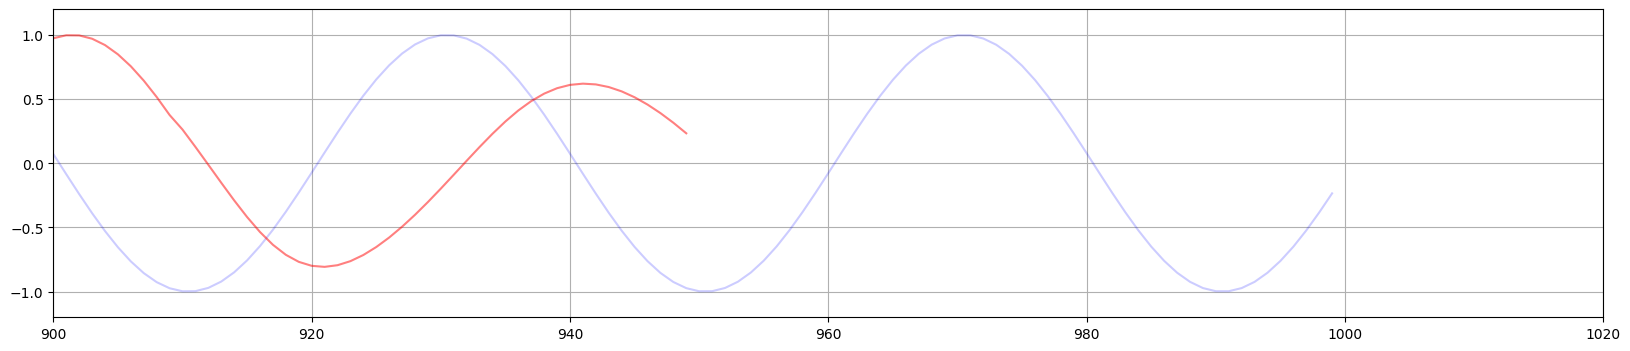

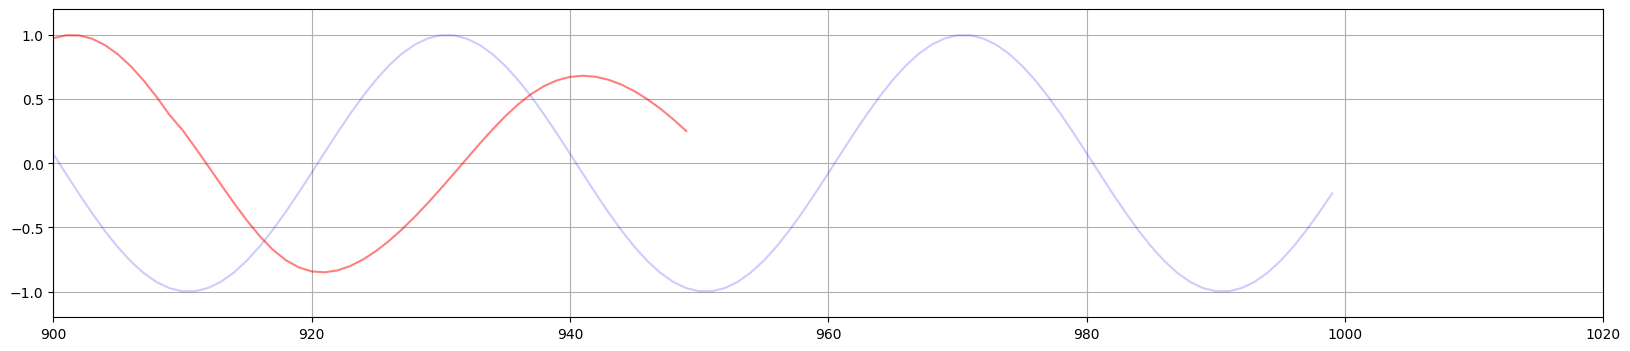

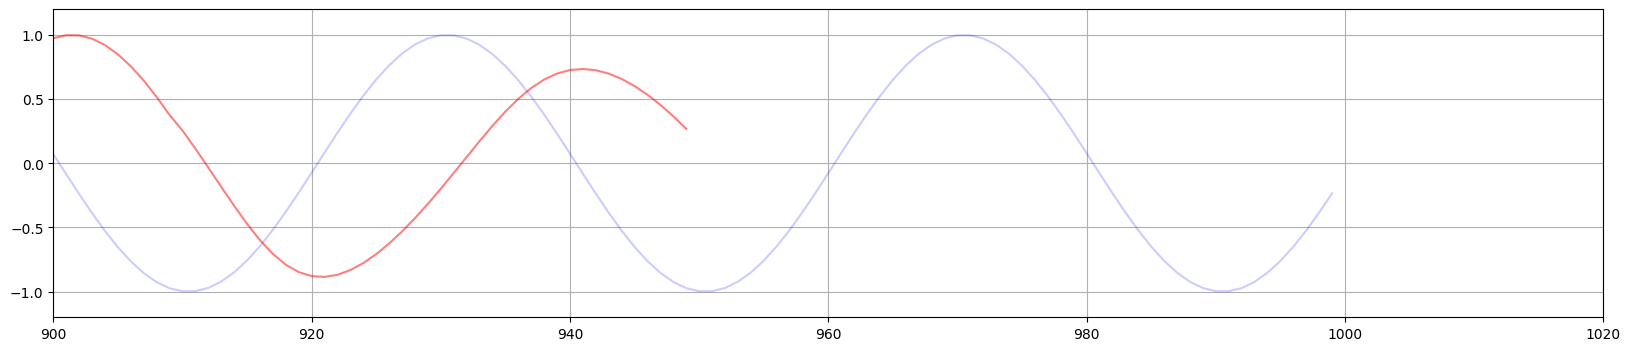

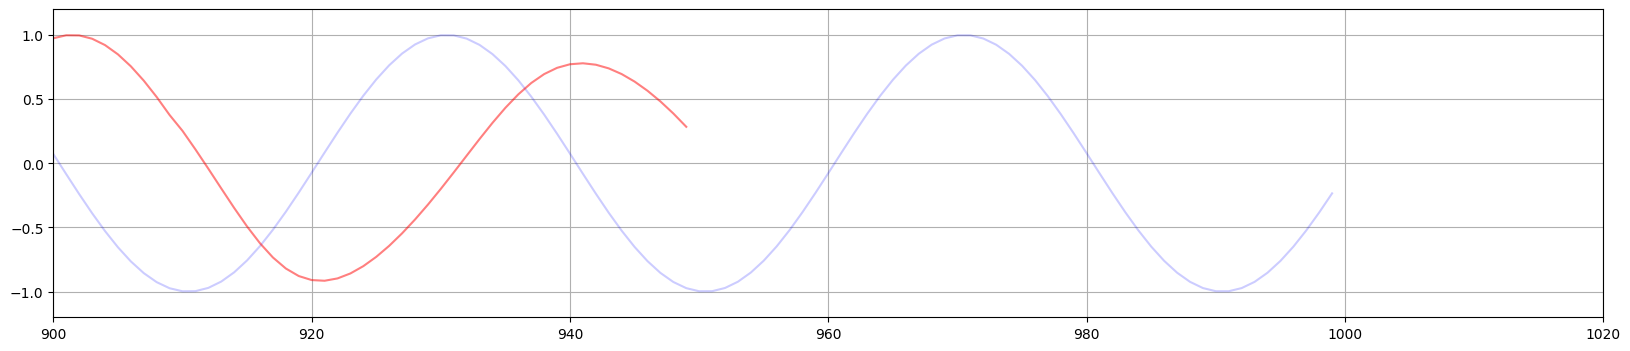

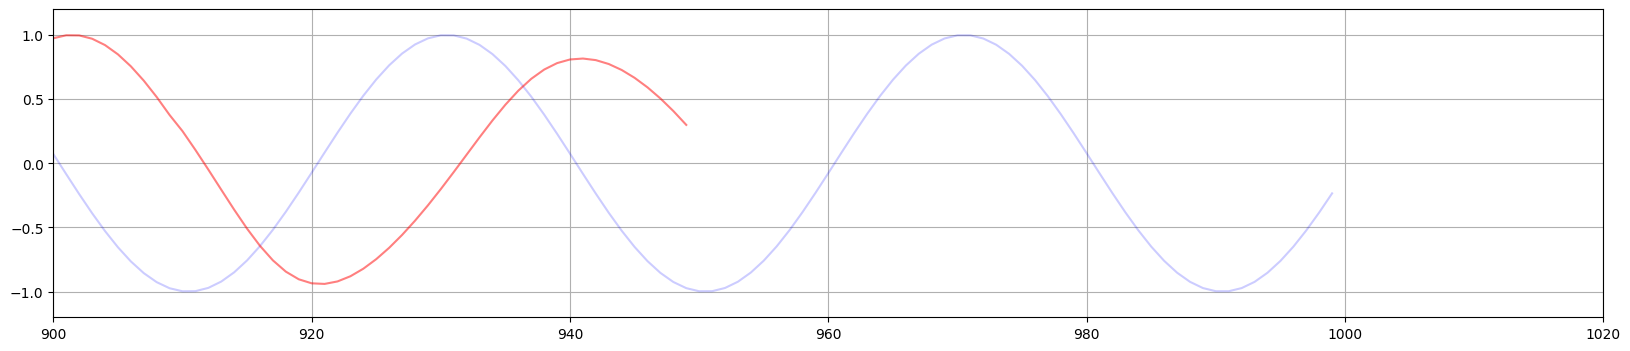

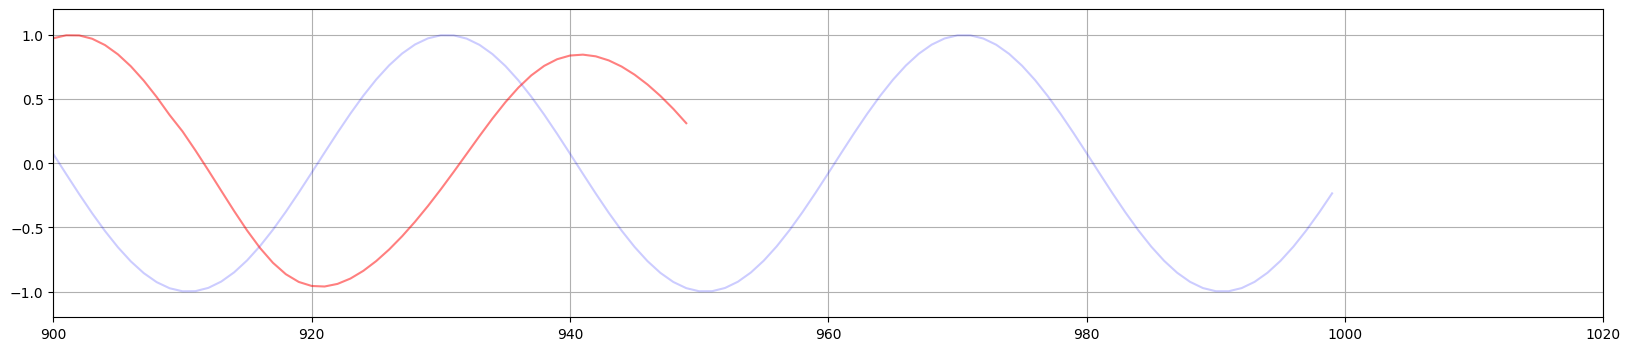

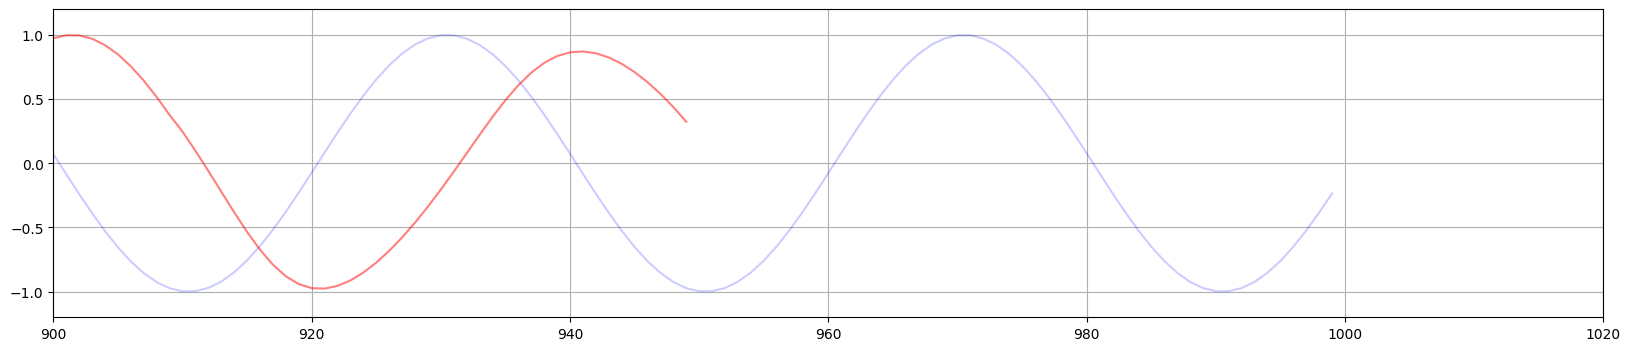

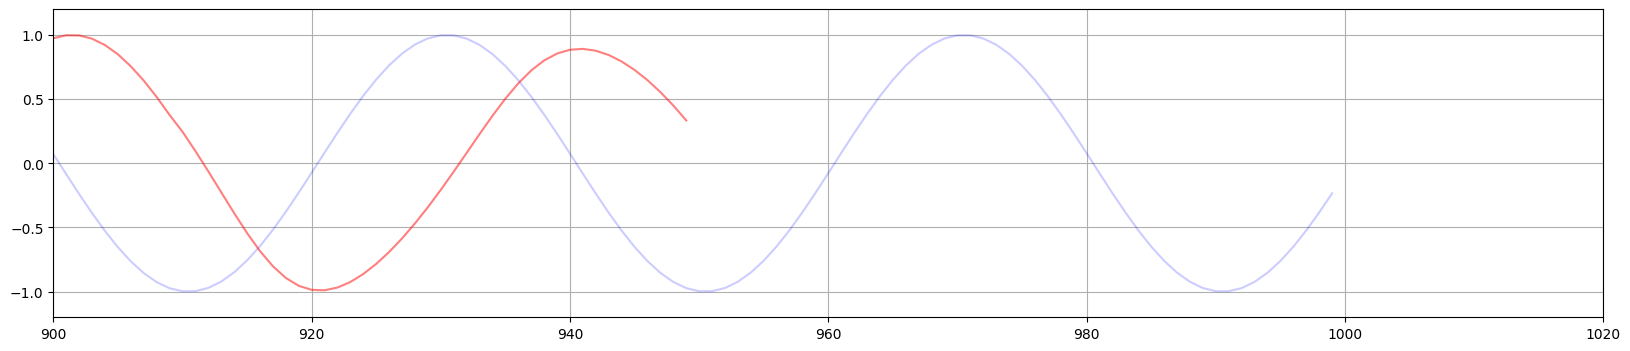

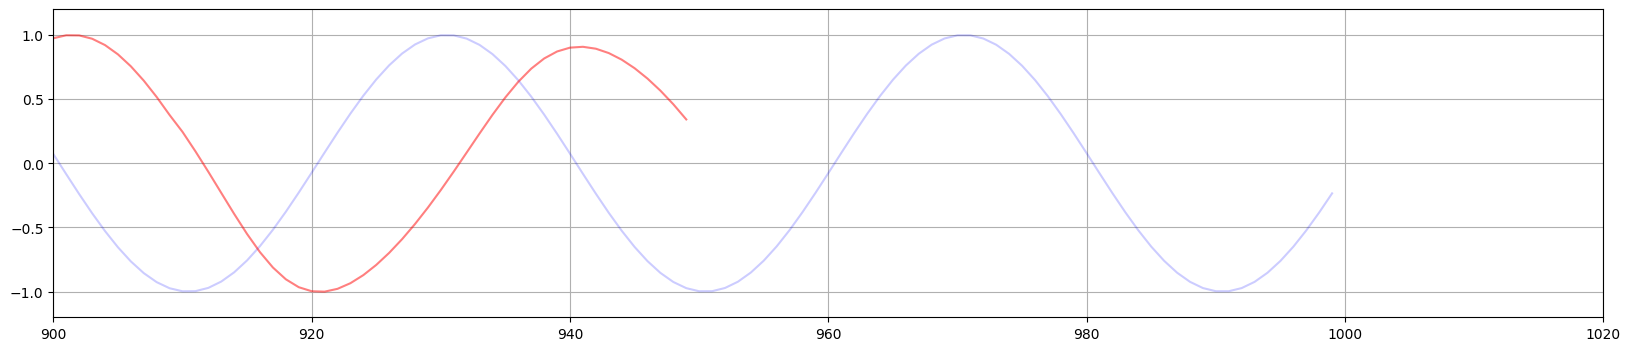

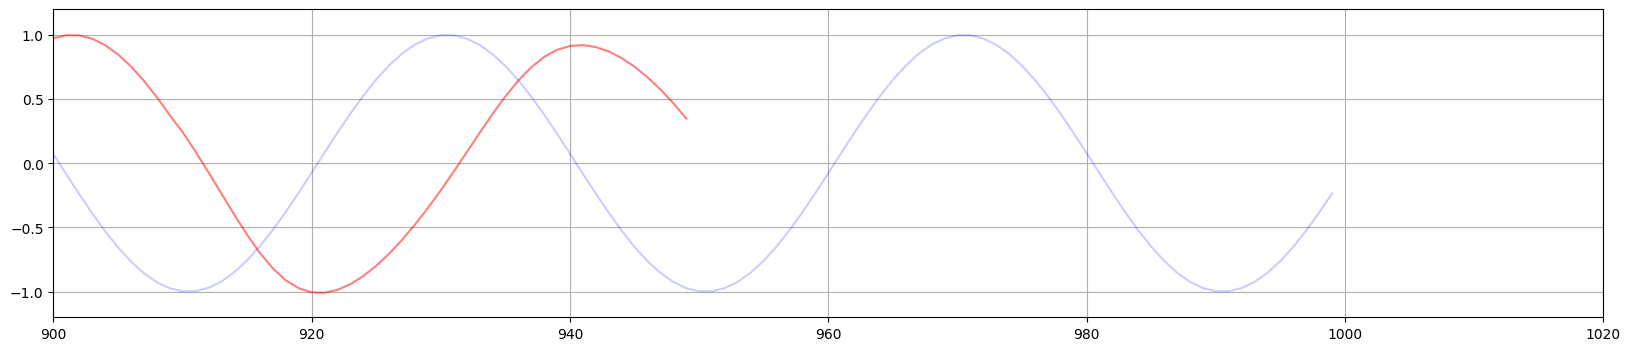

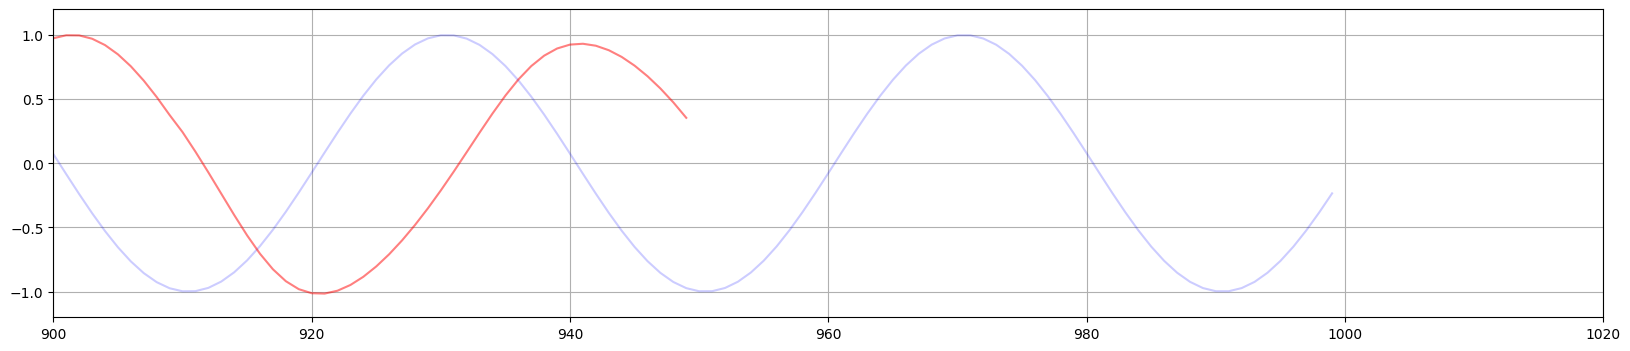

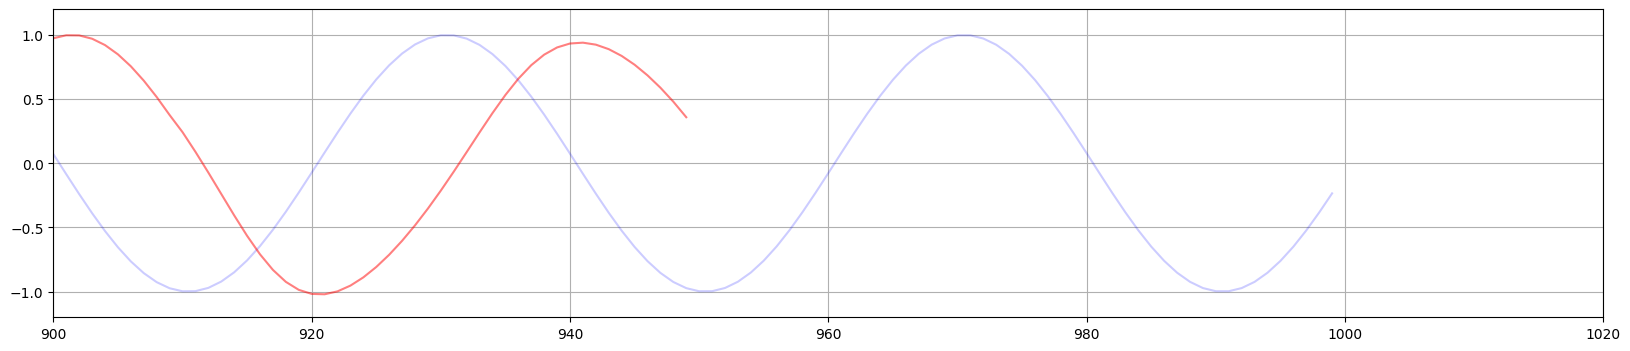

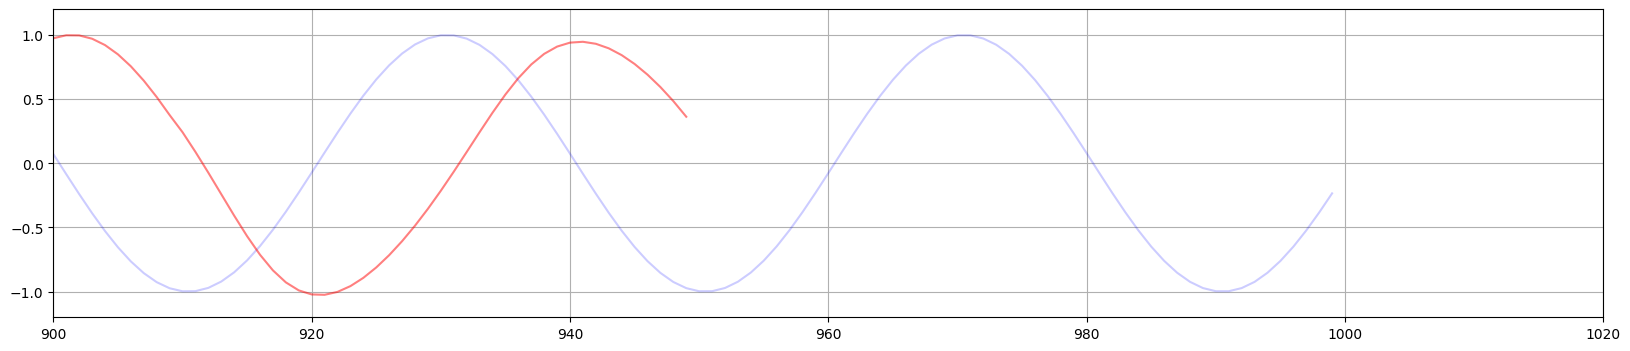

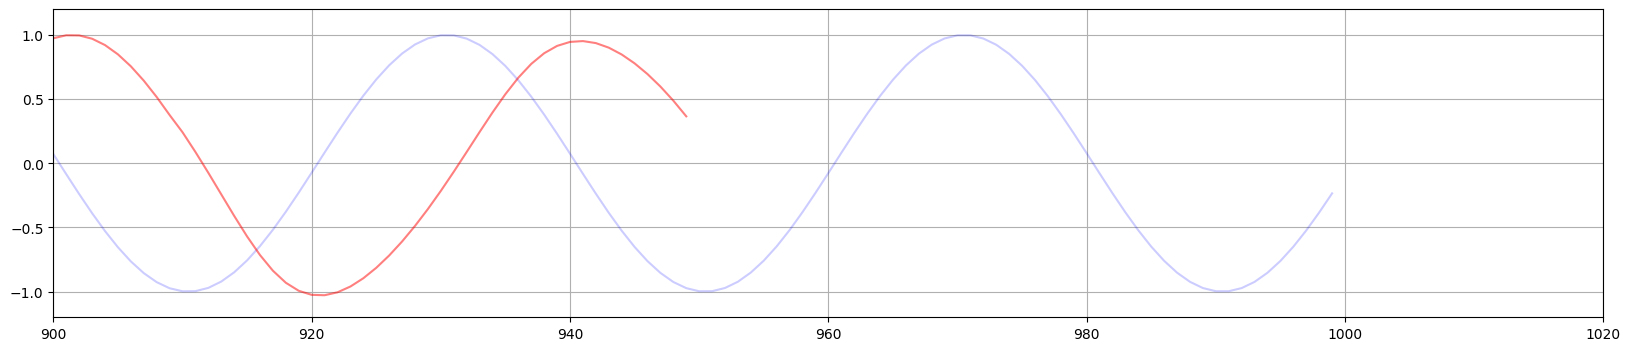

In [114]:
epochs = 50
future = 40

for i in range(epochs):
  for seq, y_train in train_data:

    optim.zero_grad()
    model.hidden = (
        torch.zeros(1,1,model.hidden_size),
        torch.zeros(1,1,model.hidden_size)
      )

    y_pred = model(seq)

    loss = criterion(y_pred, y_train)
    loss.backward()
    optim.step()

  print(f"Epoch {i} Loss: {loss.item()}")

  preds = train_data[-1][0].tolist()
  for f in range(future):

    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():

      model.hidden = (
        torch.zeros(1,1,model.hidden_size),
        torch.zeros(1,1,model.hidden_size)
      )

      preds.append(model(seq).item())

  loss = criterion(torch.tensor(preds[-window_size:]), test_data[:window_size])
  print(f"Performance on test set: {loss}")

  plt.figure(figsize=(20,4))
  plt.xlim(900, 1020)
  plt.ylim(-1.2, 1.2)
  plt.grid(True)

  plt.plot(range(900, 1000), test_data, color="b", label="test", alpha=.2)
  plt.plot(range(900, 900+window_size), preds[-window_size:], color="r", label="test", alpha=.5)

  plt.savefig(f"Plot_{i}.png", format="png")
  # plt.show()

In [ ]:
from google.colab import files
import os

In [119]:



for path, _, file_names in os.walk("/content/"):
  for file in file_names:
    files.download(f"{path}/{file}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>